Problem: Classifying Customer Segments
Context: You work for a retail company that wants to segment its customers to tailor marketing strategies better. You have customer data that includes various features like age, income, spending score, and shopping frequency.

Dataset:

Features:

Age
Annual Income
Spending Score (a measure of spending habits on a scale of 1-100)
Shopping Frequency (number of visits to the store per month)
Target:

Customer Segment (categorical: e.g., "Low Spender", "Medium Spender", "High Spender")
Task:
Use the k-NN algorithm to classify customers into different segments based on their features.

Steps:

Data Preprocessing:

Normalize numerical features (e.g., age, income) since k-NN is sensitive to the scale of data.
Convert the target variable "Customer Segment" into numerical labels if it's not already.
Model Building:

Choose an appropriate value for 
𝑘
k (the number of neighbors) through cross-validation or another method.
Train the k-NN model on the labeled data.
Evaluation:

Evaluate the model using metrics like accuracy, precision, recall, and F1-score.
Analyze the confusion matrix to understand the model's performance across different customer segments.
Application:

Use the trained model to classify new customers into segments, aiding targeted marketing and personalized offers.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 100 non-null    int64 
 1   Annual Income       100 non-null    int64 
 2   Spending Score      100 non-null    int64 
 3   Shopping Frequency  100 non-null    int64 
 4   Customer Segment    100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [6]:
df

,Age,Annual Income,Spending Score,Shopping Frequency,Customer Segment
0,56,91228,2,14,Low Spender
1,69,78984,3,18,Low Spender
2,46,70774,56,2,Medium Spender
3,32,32568,81,22,High Spender
4,60,92592,59,3,Medium Spender
...,...,...,...,...,...
95,42,69353,89,17,High Spender
96,62,92003,99,8,High Spender
97,58,113211,25,1,Low Spender
98,46,82733,93,9,High Spender


In [7]:
label = LabelEncoder()

In [9]:
df['Customer Segment'] =  label.fit_transform(df['Customer Segment'])

In [12]:
X = df.drop('Customer Segment', axis=1)
y = df['Customer Segment']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [15]:
from sklearn.metrics import accuracy_score

In [71]:
k_values = range(1,21)
train_pred =[]
test_pred = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)
    train_errors = 1-accuracy_score(y_train, train_preds)
    test_errors = 1-accuracy_score(y_test, test_preds)
    train_pred.append(train_errors)
    test_pred.append(test_errors)

In [72]:
import matplotlib.pyplot as plt

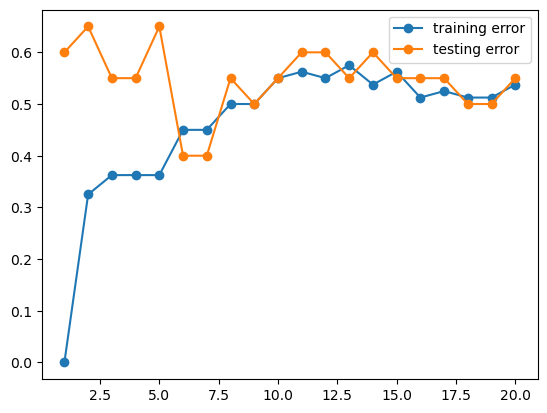

In [73]:
plt.plot(k_values, train_pred, label='training error', marker='o')
plt.plot(k_values, test_pred, label='testing error', marker='o')
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn = KNeighborsClassifier()

In [59]:
param = {'n_neighbors':list(range(1,21))}

In [60]:
gs = GridSearchCV(estimator=knn, param_grid = param, cv=5, scoring='accuracy')

In [61]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [62]:
best = gs.best_params_['n_neighbors']

In [63]:
best

15

In [75]:
ss = StandardScaler()

In [77]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
knn1 = KNeighborsClassifier(n_neighbors=15)
models = knn1.fit(X_train, y_train)
y_pred = models.predict(X_test)
a = classification_report(y_test, y_pred)
print(a)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      1.00      1.00         8
           2       1.00      0.67      0.80         6

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.89        20
weighted avg       0.93      0.90      0.90        20

